In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
Real = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
Real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
Fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
Real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
Fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
#Fake = Fake.drop

In [7]:
Fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
Real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
Real['isfake']=1
Fake['isfake']=0


In [10]:
Fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
Real.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
data =pd.concat([Real,Fake], ignore_index=True)
data

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [13]:
data.drop(['date'], axis =1, inplace= True)
data

,title,text,subject,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


In [14]:
data['news'] = data['title'] +' '+data['text']
data.head()

,title,text,subject,isfake,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [15]:
data['news'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [16]:
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [17]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [18]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3 and token not in stop_words:
            result.append(token)
    return result

In [19]:
data['clean'] = data['news'].apply(preprocess)

In [21]:
data['clean'][0]

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [24]:
list_words = []
for i in data.clean:
    for j in i:
        list_words.append(j)
print (format(len(list_words)))


9276947


In [26]:
total_unique_words = len(list(set(list_words)))
total_unique_words

108704

In [28]:
data['clean_joined'] = data['clean'].apply(lambda x: " ".join(x))
data['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

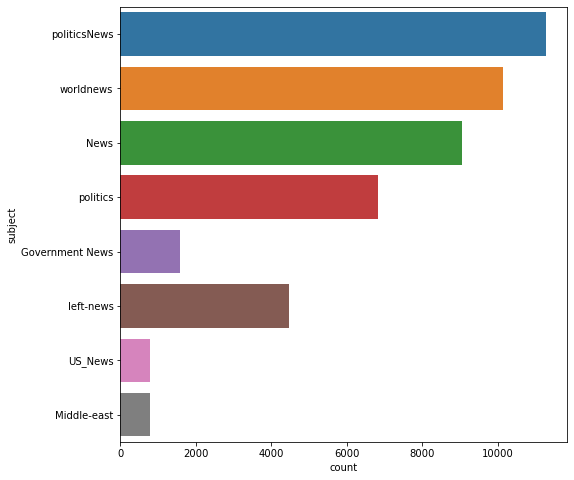

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(y = 'subject', data = data)

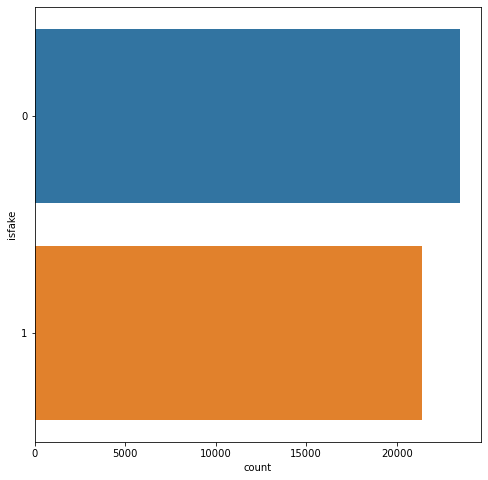

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(y = 'isfake', data = data)

In [35]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [37]:
maxlen = -1
for news in data.clean_joined:
    tokens = nltk.word_tokenize(news) #converts text to tokens (words)
    if (maxlen < len(tokens)):
        maxlen = len(tokens)
print (maxlen)

4405


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['clean_joined'], data['isfake'], test_size = 0.2, random_state = 42)

In [43]:
x_train[0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [48]:
import tensorflow as tf

In [49]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= total_unique_words)
tokenizer.fit_on_texts(x_train) #It creates vocabulary index ("word_index") based on word frequency
train_sequences = tokenizer.texts_to_sequences(x_train) # Replace each word in text with corresponding integer value from "word_index"
test_sequences = tokenizer.texts_to_sequences(x_test)

In [51]:
test_sequences[1]

[438,
 386,
 7102,
 2180,
 4283,
 58536,
 27,
 10,
 1,
 2344,
 235,
 21,
 970,
 386,
 487,
 306,
 1759,
 279,
 15,
 8,
 2387,
 12229,
 13423,
 32026,
 6428,
 386,
 363,
 1671,
 626,
 155,
 1682,
 181,
 1323,
 6222,
 4622,
 27,
 187,
 3969,
 39,
 438,
 386,
 781,
 781,
 196,
 7950,
 3873,
 16654,
 4,
 549,
 2678,
 386,
 217,
 206,
 46,
 363,
 2860,
 3,
 382,
 4130,
 1675,
 28356,
 24575,
 70,
 13024,
 5962,
 2202,
 161,
 15448,
 386,
 683,
 396,
 14069,
 7506,
 22012,
 60290,
 3296,
 199,
 9197,
 4372,
 860,
 447,
 13,
 40491,
 18,
 447,
 11114,
 1199,
 514,
 315,
 314,
 9658,
 176,
 2602,
 4542,
 10,
 1,
 3222,
 7317,
 2018,
 1651,
 557,
 283,
 38732,
 70,
 7880,
 1651,
 216,
 55,
 343,
 1385,
 789,
 1140,
 1671,
 626,
 46,
 53,
 184,
 362,
 15117,
 1671,
 7295,
 292,
 1752,
 1,
 10401,
 345,
 396,
 1707,
 9197,
 626,
 1671,
 1989,
 2,
 1449,
 2251,
 159,
 180,
 106,
 8299,
 4,
 2251,
 202,
 825,
 2251,
 202,
 5208,
 27,
 3655,
 3139,
 314,
 292,
 1323,
 4144,
 1323,
 4977,
 46,
 19372

In [52]:
len(train_sequences)

35918

In [53]:
len(test_sequences)

8980

In [54]:
print ("The encoding for news\n", data['clean_joined'][0], "\n is\n :", train_sequences[0])

The encoding for news
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying 

In [55]:
pad_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen = 4405, padding = 'post', truncating= 'post')
pad_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=4405, padding = 'post', truncating= 'post')

In [56]:
pad_train[0]

array([ 24, 969, 970, ...,   0,   0,   0], dtype=int32)

In [57]:
pad_test[0]

array([ 858,  371, 3238, ...,    0,    0,    0], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [85]:
model = tf.keras.models.Sequential([

tf.keras.layers.Embedding(total_unique_words, output_dim = 128), #Embedding Layer

tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)), #Bi-directional LSTM

#Dense layer
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(1, activation = 'sigmoid')])# binary classification (0\1)

from tensorflow.keras.models import Model

In [86]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['acc'])


In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         13914112  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 14,210,305
Trainable params: 14,210,305
Non-trainable params: 0
_________________________________________________________________


In [88]:
y_train = np.asarray(y_train)
model.fit(pad_train, y_train, batch_size= 64, validation_split = 0.2, epochs= 2)

Epoch 1/2
449/449 [==============================] - 335s 746ms/step - loss: 0.0493 - acc: 0.9803 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 2/2
449/449 [==============================] - 328s 730ms/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0039 - val_acc: 0.9989


In [89]:
resluts = model.predict(pad_test)

In [90]:
prediction = []
for i in range (len(resluts)):
    if resluts[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [91]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print (accuracy)

0.9985523385300669


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)